# Probabilities

The probability that the minimum of a sample of size $n$ chosen without replacement from a set of size $N$ is equal to $m$ is given by:

$$
P(\text{min} = m) = \frac{\binom{N - m}{n - 1}}{\binom{N}{n}}
$$

Where:
- $N$ is the total number of elements in the set.
- $n$ is the number of elements selected.
- $m$ is the minimum value.

The binomial coefficient $ \binom{N - m}{n - 1} $ represents the number of ways to choose $n-1$ elements from the remaining $N - m$ elements.

In [1]:
import pandas as pd
from math import comb
import numpy as np


def calculate_probabilities(min_num: int, max_num: int) -> pd.DataFrame:
    # Set N = 10
    N = max_num - min_num + 1
    
    # Initialize a matrix to store the probabilities
    probabilities = np.zeros((N, N))
    
    # Calculate the probabilities for each n and m
    for n in range(1, N + 1):
        total_combinations = comb(N, n)
        for m in range(1, N - n + 2):
            current_combination = comb(N - m, n - 1)
            probabilities[n-1, m-1] = current_combination / total_combinations

    return pd.DataFrame(probabilities, columns=[f'm={i}' for i in range(1, N+1)], 
                                index=[f'n={i}' for i in range(1, N+1)])

# Parameters
min_num = 1
max_num = 10
N = max_num - min_num + 1

# Generate the table
probability_table = calculate_probabilities(min_num, max_num)

# Display the table
probability_table.style.background_gradient(cmap='viridis', vmin=0, vmax=1)

,m=1,m=2,m=3,m=4,m=5,m=6,m=7,m=8,m=9,m=10
n=1,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
n=2,0.200000,0.177778,0.155556,0.133333,0.111111,0.088889,0.066667,0.044444,0.022222,0.000000
n=3,0.300000,0.233333,0.175000,0.125000,0.083333,0.050000,0.025000,0.008333,0.000000,0.000000
n=4,0.400000,0.266667,0.166667,0.095238,0.047619,0.019048,0.004762,0.000000,0.000000,0.000000
n=5,0.500000,0.277778,0.138889,0.059524,0.019841,0.003968,0.000000,0.000000,0.000000,0.000000
n=6,0.600000,0.266667,0.100000,0.028571,0.004762,0.000000,0.000000,0.000000,0.000000,0.000000
n=7,0.700000,0.233333,0.058333,0.008333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
n=8,0.800000,0.177778,0.022222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
n=9,0.900000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
n=10,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


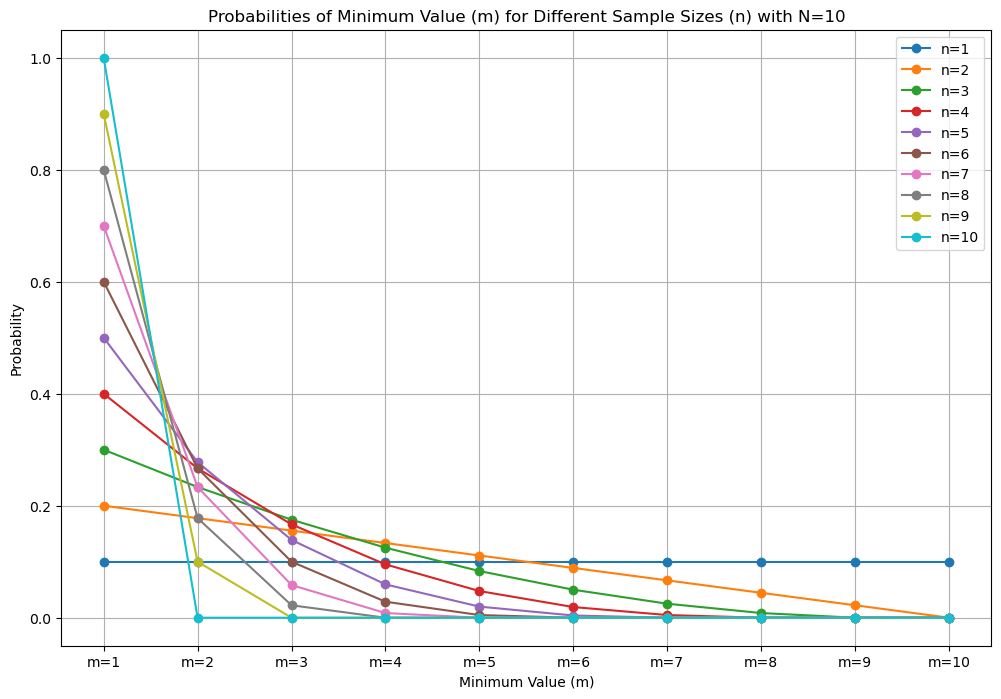

In [3]:
from matplotlib import pyplot


# Plot the probabilities as a line graph for each n
pyplot.figure(figsize=(12, 8))

for n in probability_table.index:
    pyplot.plot(probability_table.columns, probability_table.loc[n], marker='o', label=n)

pyplot.title(f'Probabilities of Minimum Value (m) for Different Sample Sizes (n) with N={N}')
pyplot.xlabel('Minimum Value (m)')
pyplot.ylabel('Probability')
pyplot.xticks(probability_table.columns)
pyplot.legend()
pyplot.grid(True)
pyplot.show()

For a given batch size, what is the probability that the next generated number is greater than k?

In [12]:
import pandas as pd
from math import comb
import numpy as np


def calculate_probabilities(min_num: int, max_num: int) -> pd.DataFrame:
    N = max_num - min_num + 1
    
    probabilities = np.zeros((N, N))

    for n in range(1, N + 1):
        total_combinations = comb(N, n)
        for m in range(1, N - n + 2):
            numbers_greater_than_m = max_num - m
            favorable_combinations = comb(numbers_greater_than_m, n)
            probabilities[n-1, m-1] = favorable_combinations / total_combinations

    return pd.DataFrame(probabilities, columns=[f'm={i}' for i in range(1, N+1)], 
                                index=[f'n={i}' for i in range(1, N+1)])

# Parameters
min_num = 1
max_num = 10

# Generate the table
probability_table = calculate_probabilities(min_num, max_num)

# Display the table
probability_table.style.background_gradient(cmap='viridis', vmin=0, vmax=1)

,m=1,m=2,m=3,m=4,m=5,m=6,m=7,m=8,m=9,m=10
n=1,0.900000,0.800000,0.700000,0.600000,0.500000,0.400000,0.300000,0.200000,0.100000,0.000000
n=2,0.800000,0.622222,0.466667,0.333333,0.222222,0.133333,0.066667,0.022222,0.000000,0.000000
n=3,0.700000,0.466667,0.291667,0.166667,0.083333,0.033333,0.008333,0.000000,0.000000,0.000000
n=4,0.600000,0.333333,0.166667,0.071429,0.023810,0.004762,0.000000,0.000000,0.000000,0.000000
n=5,0.500000,0.222222,0.083333,0.023810,0.003968,0.000000,0.000000,0.000000,0.000000,0.000000
n=6,0.400000,0.133333,0.033333,0.004762,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
n=7,0.300000,0.066667,0.008333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
n=8,0.200000,0.022222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
n=9,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
n=10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


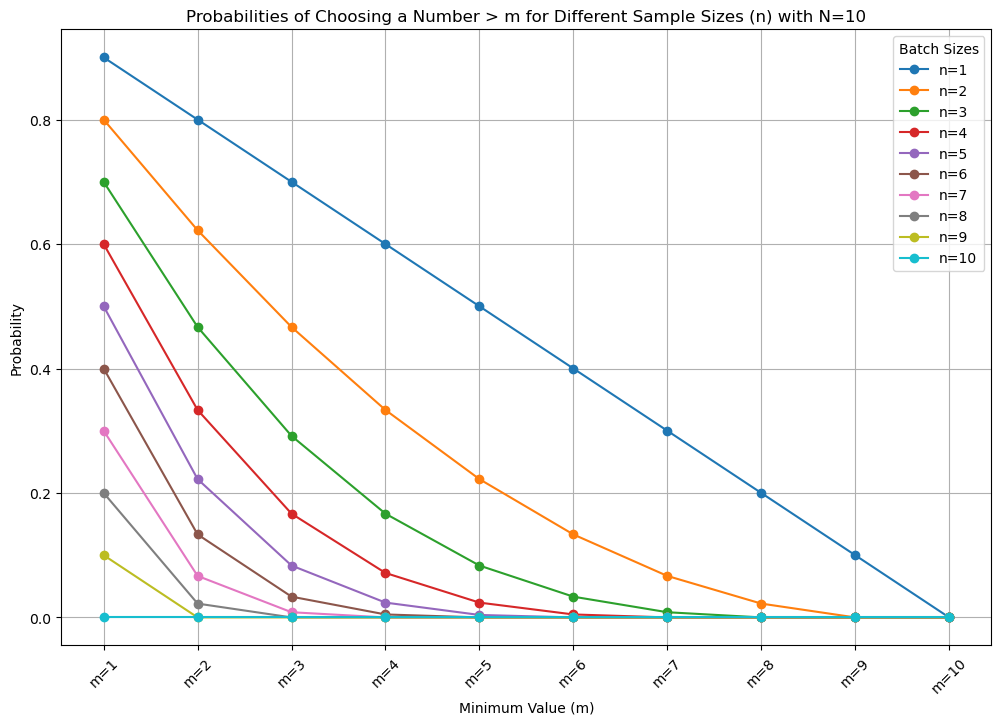

In [17]:
from matplotlib import pyplot

# Plotting the line graph for the probability DataFrame
pyplot.figure(figsize=(12, 8))

#for column in probability_table.columns:
#    pyplot.plot(probability_table.index, probability_table[column], marker='o', label=column)

for n in probability_table.index:
    pyplot.plot(probability_table.columns, probability_table.loc[n], marker='o', label=n)

pyplot.title(f'Probabilities of Choosing a Number > m for Different Sample Sizes (n) with N={N}')
pyplot.xlabel('Minimum Value (m)')
pyplot.ylabel('Probability')
pyplot.xticks(rotation=45)
pyplot.legend(title='Batch Sizes')
pyplot.grid(True)
pyplot.show()